(331, 10) 
 [[-0.04910502 -0.04464164 -0.05686312 -0.04354219 -0.04559945 -0.04327577
   0.00077881 -0.03949338 -0.01190068  0.01549073]
 [-0.05273755 -0.04464164 -0.05578531 -0.03665645  0.08924393 -0.00319277
   0.00814208  0.03430886  0.13237265  0.00306441]
 [-0.09269548  0.05068012 -0.0902753  -0.05731367 -0.02496016 -0.03043668
  -0.00658447 -0.00259226  0.02405258  0.00306441]]

 (331,) 
 [ 68. 109.  94.]

权重系数: [ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354]

常数项: 153.06798218266258

均方误差: 3180.20

均方误差: 0.33

R^2: 0.36


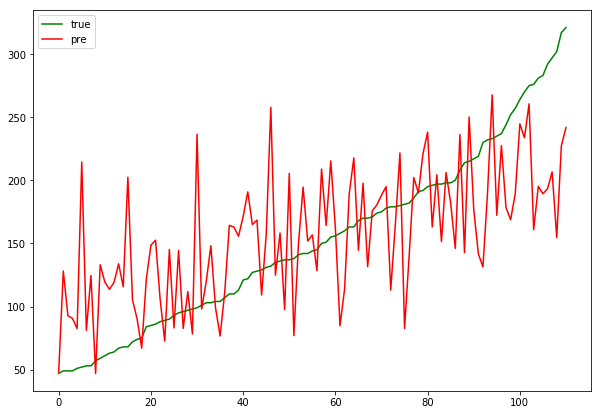

In [1]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split


# 使用 scikit-learn 自带的一个糖尿病病人的数据集
diabetes = datasets.load_diabetes()  
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, 
                                                    test_size=0.25, 
                                                    random_state=0)
print(X_train.shape, '\n', X_train[:3])
print('\n', y_train.shape, '\n', y_train[:3])

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pre = regr.predict(X_test)
print('\n权重系数:', regr.coef_)
print('\n常数项:', regr.intercept_)
print("\n均方误差: %.2f" % np.mean((y_pre - y_test) ** 2))
print("\n均方误差: %.2f" % np.mean((abs(y_pre - y_test)/y_test) ** 2))
print('\nR^2: %.2f' % regr.score(X_test, y_test))

import matplotlib.pyplot as plt
indexSort = np.argsort(y_test)
plt.figure(figsize=(10, 7))
plt.plot(range(len(y_test)), y_test[indexSort], c='g', label='true')
plt.plot(range(len(y_test)), y_pre[indexSort], c='r', label='pre')
plt.legend()
plt.show()

### 尝试降维处理,效果依然不理想

In [12]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)  # 降维5维
pca.fit(diabetes.data)
print(pca.explained_variance_ratio_ )
x_2d = pca.transform(diabetes.data)

[0.40242142 0.14923182 0.12059623 0.09554764 0.06621856]


(331, 5) 
 [[ 0.09559555 -0.01379414 -0.01774359  0.03132421 -0.01428631]
 [-0.04639546  0.07644115 -0.05539475  0.05437639 -0.01726998]
 [ 0.06196424 -0.03389808 -0.0850831  -0.02615259  0.03144301]]

 (331,) 
 [ 68. 109.  94.]

权重系数: [-444.26162175 -287.85981414  223.12076609  641.60230221    8.05433472]

常数项: 152.84779872161732

均方误差: 3143.45

均方误差: 0.33

R^2: 0.37


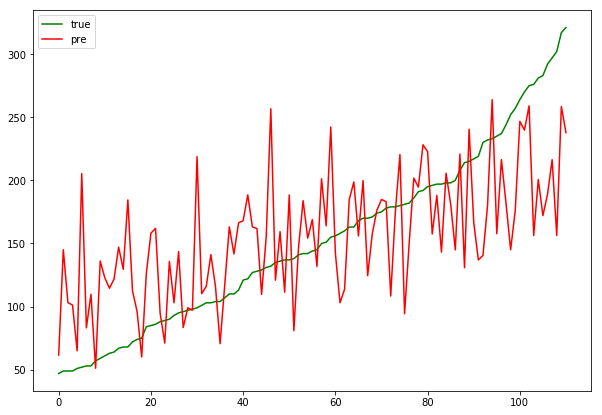

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_2d, 
                                                    diabetes.target, 
                                                    test_size=0.25, 
                                                    random_state=0)

print(X_train.shape, '\n', X_train[:3])
print('\n', y_train.shape, '\n', y_train[:3])

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pre = regr.predict(X_test)
print('\n权重系数:', regr.coef_)
print('\n常数项:', regr.intercept_)
print("\n均方误差: %.2f" % np.mean((y_pre - y_test) ** 2))
print("\n均方误差: %.2f" % np.mean((abs(y_pre - y_test)/y_test) ** 2))
print('\nR^2: %.2f' % regr.score(X_test, y_test))

import matplotlib.pyplot as plt
indexSort = np.argsort(y_test)
plt.figure(figsize=(10, 7))
plt.plot(range(len(y_test)), y_test[indexSort], c='g', label='true')
plt.plot(range(len(y_test)), y_pre[indexSort], c='r', label='pre')
plt.legend()
plt.show()